## Assignment Question 1:

There is another way of data scaling, where the minimum of feature is made equal to zero and the maximum of feature equal to one. MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

In [1]:
# import module
from sklearn.preprocessing import MinMaxScaler
 
# create data
data = [[11, 2], [3, 7], [0, 10], [11, 8]]
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(data)
scaled_data=model.transform(data)
 
# print scaled features
print(scaled_data)

[[1.         0.        ]
 [0.27272727 0.625     ]
 [0.         1.        ]
 [1.         0.75      ]]


## Assignment Question 2:

Scaling is done considering the whole feature vector to be of unit length. This usually means dividing each component by the Euclidean length of the vector (L2 Norm). In some applications (e.g., histogram features), it can be more practical to use the L1 norm of the feature vector.

Like Min-Max Scaling, the Unit Vector technique produces values of range [0,1]. When dealing with features with hard boundaries, this is quite useful. For example, when dealing with image data, the colors can range from only 0 to 255.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


In [3]:
##Unit vector with L1 norm
df1 = df.apply(lambda x: x/np.linalg.norm(x, 1))
df1

,WEIGHT,PRICE
Orange,0.272727,0.090909
Apple,0.327273,0.272727
Banana,0.218182,0.181818
Grape,0.181818,0.454545


In [4]:
## Unit vector with L2 norm 
df2 = df.apply(lambda x: x/np.linalg.norm(x, 2))
df2

,WEIGHT,PRICE
Orange,0.532666,0.160128
Apple,0.639199,0.480384
Banana,0.426132,0.320256
Grape,0.355110,0.800641


## Assignment Question 3:

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data points much easier and faster for machine learning algorithms without extraneous variables to process.

In [5]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split into training and testing sets
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    stratify=y, random_state=0
)
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(solver='liblinear')

C:\Users\kriti\AppData\Local\Temp\ipykernel_4100\1079956100.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


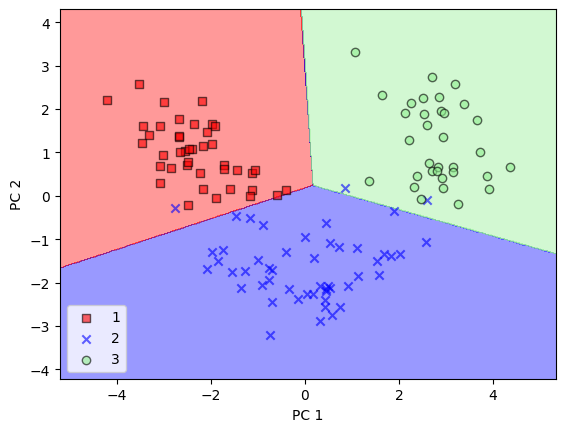

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)# plot decision regions for training set


plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

C:\Users\kriti\AppData\Local\Temp\ipykernel_4100\1079956100.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


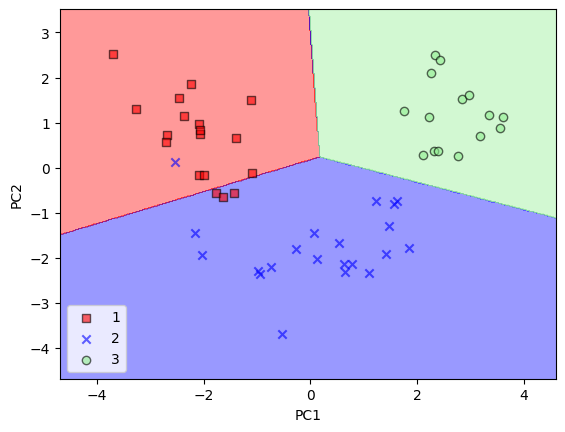

In [9]:
# plot decision regions for test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

## Assignment Question 4:

PCA is a dimensionality reduction that identifies important relationships in our data, transforms the existing data based on these relationships, and then quantifies the importance of these relationships so we can keep the most important relationships and drop the others.

Data compression: PCA can be used to reduce the dimensionality of high-dimensional datasets, making them easier to store and analyze.

Feature extraction: PCA can be used to identify the most important features in a dataset, which can be used to build predictive models

In [10]:
import os

In [11]:
os.getcwd()

'C:\\Users\\kriti'

In [12]:
os.chdir("C:\\Users\\kriti\\Downloads")

In [13]:
import pandas as pd
df = pd.read_csv("Placement_Data_Full_Class.csv")

In [14]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [15]:
# Perform one-hot encoding
#
categorical_columns = df.columns[df.dtypes == object] # Find all categorical columns
 
df = pd.get_dummies(df, columns = categorical_columns, drop_first=True)
#
# Create training / test split
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(df[df.columns[df.columns != 'salary']],
                   df['salary'], test_size=0.25, random_state=1)
#
# Standardize the dataset; This is very important before you apply PCA
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Import eigh method for calculating eigenvalues and eigenvectirs
#
from numpy.linalg import eigh
#
# Determine covariance matrix
#
cov_matrix = np.cov(X_train_std, rowvar=False)
#
# Determine eigenvalues and eigenvectors
#
egnvalues, egnvectors = eigh(cov_matrix)
#
# Determine explained variance and select the most important eigenvectors based on explained variance
#
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
#
# Construct projection matrix using the five eigenvectors that correspond to the top five eigenvalues (largest), to capture about 75% of the variance in this dataset
#
egnpairs = [(np.abs(egnvalues[i]), egnvectors[:, i])
                for i in range(len(egnvalues))]
egnpairs.sort(key=lambda k: k[0], reverse=True)
projectionMatrix = np.hstack((egnpairs[0][1][:, np.newaxis],
                              egnpairs[1][1][:, np.newaxis],
                              egnpairs[2][1][:, np.newaxis],
                              egnpairs[3][1][:, np.newaxis],
                              egnpairs[4][1][:, np.newaxis]))
#
# Transform the training data set
#
X_train_pca = X_train_std.dot(projectionMatrix)

## Assignment Question 5:

### Build a recommendation system for a food delivery service

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
zomato_real = pd.read_csv("zomato.csv")
zomato_real.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [18]:
#Deleting Unnnecessary Columns
zomato=zomato_real.drop(['url','dish_liked','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)

#Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})

#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float)
#Removing '/5' from Rates
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)

## Computing Mean Rating
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)

C:\Users\kriti\AppData\Local\Temp\ipykernel_4100\2753667411.py:22: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
C:\Users\kriti\AppData\Local\Temp\ipykernel_4100\2753667411.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()


## Assignment Question 6:

### Build a model to predict stock prices use PCA to reduce the dimensionality of the dataset. 

PCA (Principal Component Analysis) is a dimensionality reduction technique that is commonly used to reduce the number of features in a dataset while retaining the most important information. In the context of building a model to predict stock prices, we could use PCA to reduce the dimensionality of the dataset by identifying the most significant features that are driving the stock price movement.

Here is a step-by-step approach to using PCA for this purpose:
1. Standardize the data: The first step is to standardize the data by subtracting the mean and dividing by the standard deviation. This ensures that all features have the same scale and helps to improve the performance of PCA.

2. Compute the covariance matrix: Next, we compute the covariance matrix of the standardized data. The covariance matrix represents the relationships between the different features in the dataset.

3. Compute the eigenvectors and eigenvalues: We then calculate the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions in which the data varies the most, while the eigenvalues represent the magnitude of the variation.

4. Select the principal components: We then select the top k eigenvectors with the highest eigenvalues. These eigenvectors are known as the principal components and represent the most important features in the dataset.

5. Project the data onto the principal components: Finally, we project the original data onto the selected principal components to obtain a new, reduced-dimensional dataset. This dataset can then be used as input to a machine learning algorithm to predict stock prices.

Can import PCA library from sklearn.decompose module

# By reducing the dimensionality of the dataset using PCA, we can simplify the problem of predicting stock prices and potentially improve the performance of our model. However, it is important to note that PCA may not always improve the performance of a model and should be evaluated carefully in each specific case.

## Assignment Question 7:

In [28]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Define the dataset
data = np.array([1, 5, 10, 15, 20])

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the data using the scaler
data_scaled = scaler.fit_transform(data.reshape(-1,1))

print(data_scaled.flatten())

[-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


## Assignment Question 8:

The number of principal components to retain in PCA depends on the level of variance we want to preserve in the dataset. In general, we want to retain enough principal components to explain a significant portion of the total variance in the data, while also keeping the number of features as small as possible.

To determine how many principal components to retain for the given dataset containing the features height, weight, age, gender, and blood pressure, we would perform the following steps:

1. Standardize the data: We would first standardize the data by subtracting the mean and dividing by the standard deviation. This ensures that all features have the same scale and helps to improve the performance of PCA.

2. Compute the covariance matrix: Next, we would compute the covariance matrix of the standardized data. The covariance matrix represents the relationships between the different features in the dataset.

3. Compute the eigenvectors and eigenvalues: We would then calculate the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions in which the data varies the most, while the eigenvalues represent the magnitude of the variation.

4. Select the principal components: We would then select the top k eigenvectors with the highest eigenvalues. These eigenvectors are known as the principal components and represent the most important features in the dataset.

5. Evaluate the explained variance: Finally, we would evaluate the amount of variance explained by each principal component and choose the number of principal components that preserve a significant portion of the total variance in the data.

Typically, we would select the number of principal components that can explain at least 80% of the total variance in the data. However, the exact number of principal components to retain may depend on the specific dataset and the problem we are trying to solve.
In summary, we would need to perform PCA on the given dataset to determine the optimal number of principal components to retain based on the amount of variance we want to preserve.
Below is Example code of How I would Perform PCA on above components :

In [29]:
# Generating random data with given features
import numpy as np
import pandas as pd

# Set the seed for reproducibility
np.random.seed(678)

# Generate random data for each feature
height = np.random.normal(loc=170, scale=10, size=10000)
weight = np.random.normal(loc=70, scale=10, size=10000)
age = np.random.randint(18, 65, size=10000)
gender = np.random.choice(['Male', 'Female'], size=10000)
blood_pressure = np.random.normal(loc=120, scale=10, size=10000)

# Combine the data into a Pandas DataFrame
data = pd.DataFrame({'Height': height, 
                     'Weight': weight, 
                     'Age': age, 
                     'Gender': gender, 
                     'Blood Pressure': blood_pressure})

# Print the first 5 rows of the data
data.head()

,Height,Weight,Age,Gender,Blood Pressure
0,197.264488,78.301335,37,Male,123.426840
1,181.909333,71.500660,41,Female,103.227835
2,172.938287,86.183821,46,Male,143.637328
3,188.764607,84.627080,55,Female,113.360023
4,165.582489,65.257311,63,Female,116.065510


In [30]:
# Seperating categorical and numerical variables in data 
cat_cols = list(data.columns[data.dtypes == 'object'])
num_cols = list(data.columns[data.dtypes != 'object'])
# Print Categorical and Numeric Variables
print('Categorical Variables : ',cat_cols)
print('Numerical Variables   : ',num_cols)

Categorical Variables :  ['Gender']
Numerical Variables   :  ['Height', 'Weight', 'Age', 'Blood Pressure']


In [31]:
# Converting Categotrical variables to Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[cat_cols[0]]=le.fit_transform(data[cat_cols].values.flatten())
data.head()

,Height,Weight,Age,Gender,Blood Pressure
0,197.264488,78.301335,37,1,123.426840
1,181.909333,71.500660,41,0,103.227835
2,172.938287,86.183821,46,1,143.637328
3,188.764607,84.627080,55,0,113.360023
4,165.582489,65.257311,63,0,116.065510


In [32]:
# Applying StandardScaler to entire dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data_scaled.head()

,Height,Weight,Age,Gender,Blood Pressure
0,2.763392,0.839863,-0.294147,0.99561,0.348117
1,1.212299,0.157775,0.003407,-1.00441,-1.689637
2,0.306094,1.630453,0.375350,0.99561,2.387031
3,1.904781,1.474316,1.044847,-1.00441,-0.667462
4,-0.436947,-0.468415,1.639956,-1.00441,-0.394522


In [33]:
# Perform PCA with 3 components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X_pca = pd.DataFrame(pca.fit_transform(data_scaled),columns=['PC1','PC2','PC3'])
# print the variance ratio explained by each principal component
print("Variance Ratio:", pca.explained_variance_ratio_)
print('\nTop 5 rows of transformed PCA data :\n',X_pca.head())

Variance Ratio: [0.20491989 0.20113817 0.20024048]

Top 5 rows of transformed PCA data :
         PC1       PC2       PC3
0  0.179922 -1.464986  0.664593
1 -0.536445 -1.423220  1.533594
2  2.149224  0.738165 -0.709998
3  1.316837 -1.776677  1.784522
4  0.597166 -0.539852  0.356913
